# CAPSTONE <span style="color:green">SPOTIFY</span><span style="color:red">&YOUTUBE</span> EDA  PROJECT
   

_Comparison of YouTube Spotify, the most popular music-related social media platform, with various metrics_

                                                                    Berna Ersarı

__EDA_1-Gaining Information About the Data Set__

__EDA_2-Albums-Artists-Songs-Likes, Comments, Views and Listening__

__EDA_3-Artists-Music Genres__

__EDA_4-Youtube Channels__

In [68]:
#Info about Data Set:

In [2]:
#Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
#Import/Read the file

df=pd.read_csv("E:/05 Kodlasam-Berna- VAM11/Kodlasam/Bitirme Projesi-2024/2-Youtube&Spotify EDA/Spotify_Youtube.csv")

# _Exploratory Data Analysis-1-Gaining Information About the Data Set_

In [4]:
#Overview columns and delete columns that may be unnecessary
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [5]:
deletes=['Unnamed: 0','Url_spotify','Uri','Url_youtube','Description']
df.drop(deletes, axis=1, inplace=True)

In [5]:
#Quick overview of the data set using the function
def general_ch (df, head=5):

    print("######## COLUMNS ########")
    print(df.columns)
    print("######## DIMENSION INFO ########")
    print(df.shape)
    print("######## NUMBER OF RECORD ########")
    print(df.shape[0]) 
    print("######## NUMBER OF COLUMNS ########")
    print(df.shape[1])
    print("######## TYPE INFO ########")
    print(df.dtypes)
    print("####### COUNT OF UNIQUE VALUES IN COLUMNS ######")
    cols=[col for col in df.columns]
    print(df[cols].nunique())
    print("######## NULL VALUES ########")
    print(df.isnull().sum())
    print("######## QUANTILES  ########")
    print(df.describe([0,0.5,0.4,0.6,0.95]).T)


general_ch(df)

######## COLUMNS ########
Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')
######## DIMENSION INFO ########
(20718, 23)
######## NUMBER OF RECORD ########
20718
######## NUMBER OF COLUMNS ########
23
######## TYPE INFO ########
Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Title                object
Channel              object
Views              

In [6]:
df.dropna

<bound method DataFrame.dropna of             Artist                                          Track  \
0         Gorillaz                                 Feel Good Inc.   
1         Gorillaz                                Rhinestone Eyes   
2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3         Gorillaz                             On Melancholy Hill   
4         Gorillaz                                 Clint Eastwood   
...            ...                                            ...   
20713  SICK LEGEND                           JUST DANCE HARDSTYLE   
20714  SICK LEGEND                 SET FIRE TO THE RAIN HARDSTYLE   
20715  SICK LEGEND                      OUTSIDE HARDSTYLE SPED UP   
20716  SICK LEGEND                            ONLY GIRL HARDSTYLE   
20717  SICK LEGEND                             MISS YOU HARDSTYLE   

                                               Album Album_type  Danceability  \
0                                         Demon Days    

In [7]:
#Fill in empty values in columns
#Delete columns that cannot be filled
#Deciding and deleting outliers in some numeric columns to be evaluated

df['Stream'] = df['Stream'].fillna(df.groupby(['Artist', 'Album'])['Stream'].transform('mean'))
df['Likes'] = df['Likes'].fillna(df.groupby('Artist')['Likes'].transform('mean'))
df['Comments'] = df['Comments'].fillna(df.groupby(['Artist', 'Album'])['Comments'].transform('mean'))

In [8]:
# Deciding on outliers and deleting them
# Detecting outliers over the values in the first 20 per cent and the last 80 per cent

Q1 = df['Views'].quantile(0.20)
Q3 = df['Views'].quantile(0.80)
IQR1 = Q3 - Q1

In [9]:
outlier_values = df[(df['Views'] < (Q1 - 1.5 * IQR1)) | (df['Views'] > (Q3 + 1.5 * IQR1))].index
print(outlier_values)

Int64Index([    0,     4,     5,    10,    11,    12,    13,    14,    15,
               16,
            ...
            20312, 20313, 20382, 20549, 20569, 20598, 20635, 20683, 20685,
            20688],
           dtype='int64', length=1945)


In [10]:
#Remove the outlier from the data set
df = df[~((df['Views'] < (Q1 - 1.5 * IQR1)) | (df['Views'] > (Q3 + 1.5 * IQR1)))]

In [11]:
Q1 = df['Likes'].quantile(0.20)
Q3 = df['Likes'].quantile(0.80)
IQR2 = Q3 - Q1

print(IQR2)

436510.0000000002


In [12]:
outlier_values2 = df[(df['Likes'] < (Q1 - 1.5 * IQR2)) | (df['Likes'] > (Q3 + 1.5 * IQR2))].index
print(outlier_values2)

Int64Index([    3,     9,    55,    57,    64,    71,    91,   142,   151,
              155,
            ...
            20627, 20636, 20666, 20667, 20669, 20674, 20682, 20684, 20689,
            20690],
           dtype='int64', length=1107)


In [13]:
df = df[~((df['Likes'] < (Q1 - 1.5 * IQR2)) | (df['Likes'] > (Q3 + 1.5 * IQR2)))]

In [14]:
Q1 = df['Comments'].quantile(0.20)
Q3 = df['Comments'].quantile(0.80)
IQR3 = Q3 - Q1

print(IQR3)

9242.0


In [15]:
outlier_values3 = df[(df['Comments'] < (Q1 - 1.5 * IQR3)) | (df['Comments'] > (Q3 + 1.5 * IQR3))].index
print(outlier_values3)

Int64Index([    1,    37,    56,    66,    99,   103,   112,   116,   119,
              123,
            ...
            20154, 20155, 20187, 20340, 20372, 20406, 20429, 20537, 20670,
            20692],
           dtype='int64', length=931)


In [16]:
df = df[~((df['Comments'] < (Q1 - 1.5 * IQR3)) | (df['Comments'] > (Q3 +1.5 * IQR3)))]

In [17]:
Q1 = df['Liveness'].quantile(0.20)
Q3 = df['Liveness'].quantile(0.80)
IQR2 = Q3 - Q1

print(IQR2)

0.19569999999999999


In [18]:
outlier_values4 = df[(df['Liveness'] < (Q1 - 1.5 * IQR2)) | (df['Liveness'] > (Q3 + 1.5 * IQR2))].index
print(outlier_values4)

Int64Index([   63,    96,   249,   296,   312,   372,   469,   472,   474,
              477,
            ...
            20503, 20578, 20581, 20582, 20586, 20588, 20590, 20650, 20653,
            20654],
           dtype='int64', length=850)


In [19]:
df = df[~((df['Liveness'] < (Q1 - 1.5 * IQR3)) | (df['Liveness'] > (Q3 +1.5 * IQR3)))]

In [20]:
#Analysing the data set within the framework of data distributions

In [21]:
def average_values (df):
    print("######## AVERAGE NUMBER OF LIKES/  Thousand ########")
    print(round(df["Likes"].mean(),0))
    print("######## AVERAGE NUMBER OF COMMENT/  Thousand ########")
    print(round(df["Comments"].mean(),0))
    print("######## AVERAGE NUMBER OF VIEWS/ Billion ########")
    print(round(df["Views"].mean(),0))
    print("######## AVERAGE NUMBER OF STREAM/ Billion ########")
    print(round(df["Stream"].mean(),0))
average_values(df)

######## AVERAGE NUMBER OF LIKES/  Thousand ########
160184.0
######## AVERAGE NUMBER OF COMMENT/  Thousand ########
4133.0
######## AVERAGE NUMBER OF VIEWS/ Billion ########
22480975.0
######## AVERAGE NUMBER OF STREAM/ Billion ########
75755900.0


# _Exploratory Data Analysis-2-Albums-Artists-Songs-Likes, Comments, Views and Listening_

album          12109
single          3976
compilation      650
Name: Album_type, dtype: int64


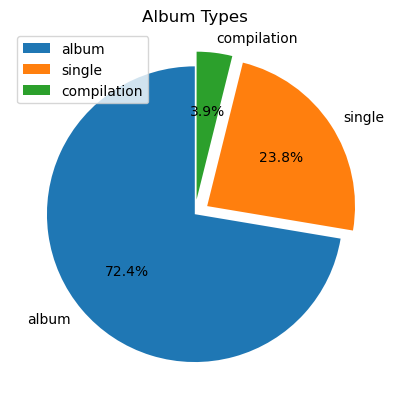

In [22]:
#ALBUM TYPE RATES IN THE DATA SET

album_type_count = df['Album_type'].value_counts()
print(album_type_count)
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0,0.1,0.1])

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

In [22]:
df["Artist"].nunique()

2064

In [23]:
df["Album"].nunique()

10229

In [24]:
#NUMBER OF LIKES BY ALBUM TYPE

likes_by_album_type = df.groupby('Album_type')['Likes'].sum().reset_index()
likes_by_album_type.sort_values(by="Likes",ascending=False)

,Album_type,Likes
0,album,1.862889e+09
2,single,7.083839e+08
1,compilation,8.393681e+07


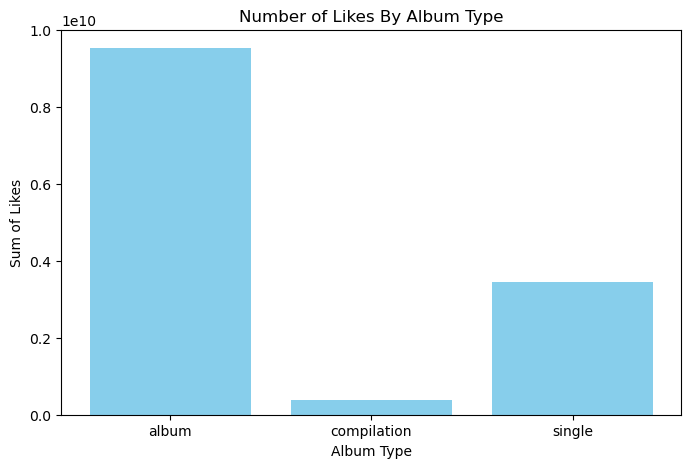

In [12]:
#NUMBER OF LIKES BY ALBUM TYPE

plt.figure(figsize=(8, 5))
plt.bar(likes_by_album_type['Album_type'], likes_by_album_type['Likes'], color='skyblue')
plt.xlabel('Album Type')
plt.ylabel('Count of Likes')
plt.title('Number of Likes By Album Type')
plt.show()

Comment:-Number of Likes By Album Type-

When we consider the number of likes according to the album release, we can see that an ‘album’ consists of 7 or more songs at most.
broadcasts/listening lists are the most liked broadcast/listening type.

Compilation albums receive fewer likes than singles and albums.

In [23]:
#TOP 20 ARTISTS BY AVERAGE VALUES

artistby_average_values = df.groupby('Artist').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
})
artistby_average_values.head(20).sort_values(by="Views", ascending=False)

,Views,Likes,Comments
Artist,,,
3 Doors Down,5.359663e+07,252945.000000,7663.285714
*NSYNC,4.103032e+07,164538.714286,9445.142857
42 Dugg,3.989732e+07,279066.777778,6131.888889
A Boogie Wit da Hoodie,3.964423e+07,379494.111111,9619.888889
2 Chainz,3.760888e+07,324544.000000,6150.428571
24kGoldn,2.971531e+07,374816.571429,9425.000000
(G)I-DLE,2.934542e+07,476056.000000,7996.000000
A Day To Remember,2.508819e+07,172574.400000,7363.600000
112,2.191345e+07,150914.100000,3569.600000


Comment:-Top20 Artists-

According to this table, I can say that the popularity of some artists on YouTube doesn't only depend on the number of views.
When we look at the number of comments and likes, we see that the level of interaction with the audience is important. Although high view counts indicate general popularity, the number of likes and comments is also an indicator of how engaged and interactive the audience is. 
For this reason, I analysed this data by calculating the variables of comment and like rates that are not in the table and adding them to the table.

In [24]:
#Like Rate Column

df['Likes_Rates']=round(df['Likes']/df['Views']*100,2)

In [25]:
#Comment Rate Column

df['Comments_Rates']=round(df['Comments']/df['Views']*100,2)

In [26]:
#ARTISTS ACCORDING TO THEIR INTERACTION

df_h = df[(df['Likes_Rates'] > 5.00) & (df['Comments_Rates'] > 0.5)]
df_m = df[((df['Likes_Rates'] > 3.00) & (df['Likes_Rates'] <= 5.00)) & ((df['Comments_Rates'] > 0.3) &
                                                                           (df['Comments_Rates'] <= 0.5))]
df_l = df[(df['Likes_Rates'] <= 3.00) & (df['Comments_Rates'] <= 0.3)]


unique_artists_h = df_h['Artist'].unique()
unique_artists_m = df_m['Artist'].unique()
unique_artists_l = df_l['Artist'].unique()


df_inter = pd.DataFrame({
    'High Interaction': pd.Series(unique_artists_h),
    'Medium Interaction': pd.Series(unique_artists_m),
    'Low Interaction': pd.Series(unique_artists_l)
})

df_inter.head(30)

,High Interaction,Medium Interaction,Low Interaction
0,thasup,Sunidhi Chauhan,Gorillaz
1,Tech N9ne,Megadeth,Red Hot Chili Peppers
2,Duster,Gustavo Cerati,50 Cent
3,Thalia,Cristian Castro,Metallica
4,Twista,Blondie,Coldplay
5,Santiago Ziesmer,Herbert von Karajan,Daft Punk
6,Redman,Ivete Sangalo,Linkin Park
7,Sertab Erener,Sir Arthur Conan Doyle,Radiohead
8,Mahalakshmi Iyer,DJ Premier,AC/DC
9,RM,Outlawz,Black Eyed Peas


Comment: -Artists According To Their Interaction-

Low interaction with artists and bands that debuted in the 90s and 2000s such as Tiesto, Eminem, Pink, Metallica 
In connection with the generation to which this situation is addressed, we see that generation X viewers and listeners use social media. 
I think it might have something to do with their habits.

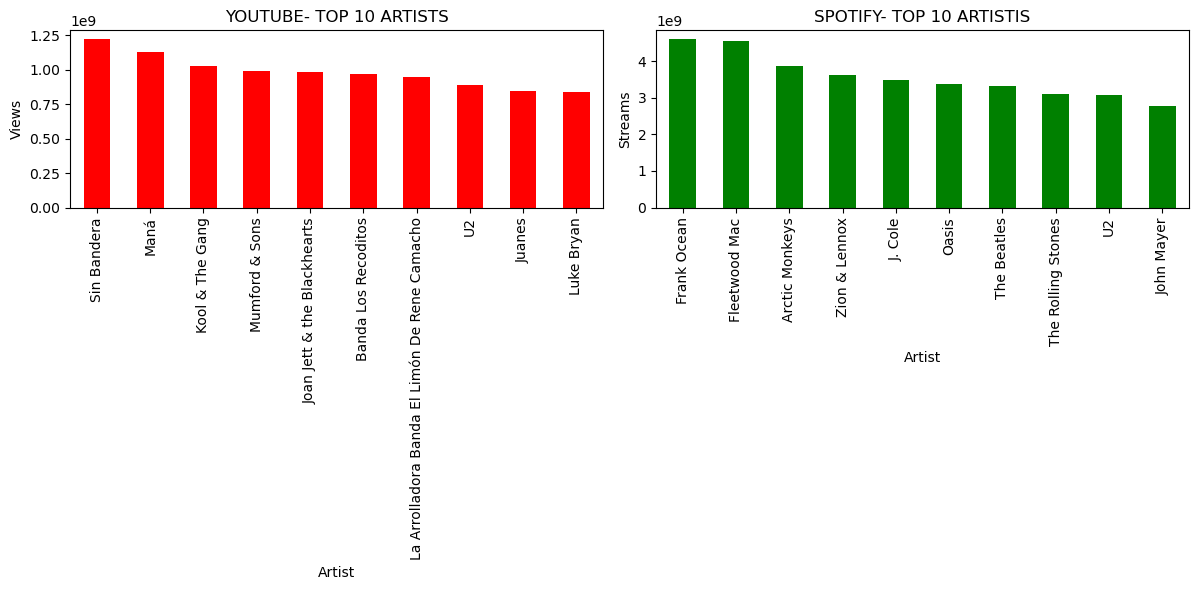

In [27]:
#TOP 10 ARTISTS ON YOUTUBE AND SPOTIFY PLATFORMS BY TOTAL VALUES

df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.set_title('YOUTUBE- TOP 10 ARTISTS')
df_views.plot(kind='bar', ax=ax1, color='red')
ax2.set_title('SPOTIFY- TOP 10 ARTISTIS')
df_streams.plot(kind='bar', ax=ax2, color='green')

ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')

fig.tight_layout()
plt.show()

Comment:-Top 10 Artist-

According to the graph above, we can think that the Top 10 artists are different on both platforms and address different audiences and audiences. We can also compare both platforms in graphics.
While the maximum number of views on Youtube is 1.25 billion; we see that this number is around 4.0 billion views and listens on Spotify.

Since Spotify is a platform that focuses on music, users prefer this platform just to listen to music and buy this application because they care about music quality and variety rather than visual content.

People are only in a listening state instead of watching something while walking on the road, doing sports or driving while doing work on the computer. We can comment that this may cause more listening numbers on spotify.

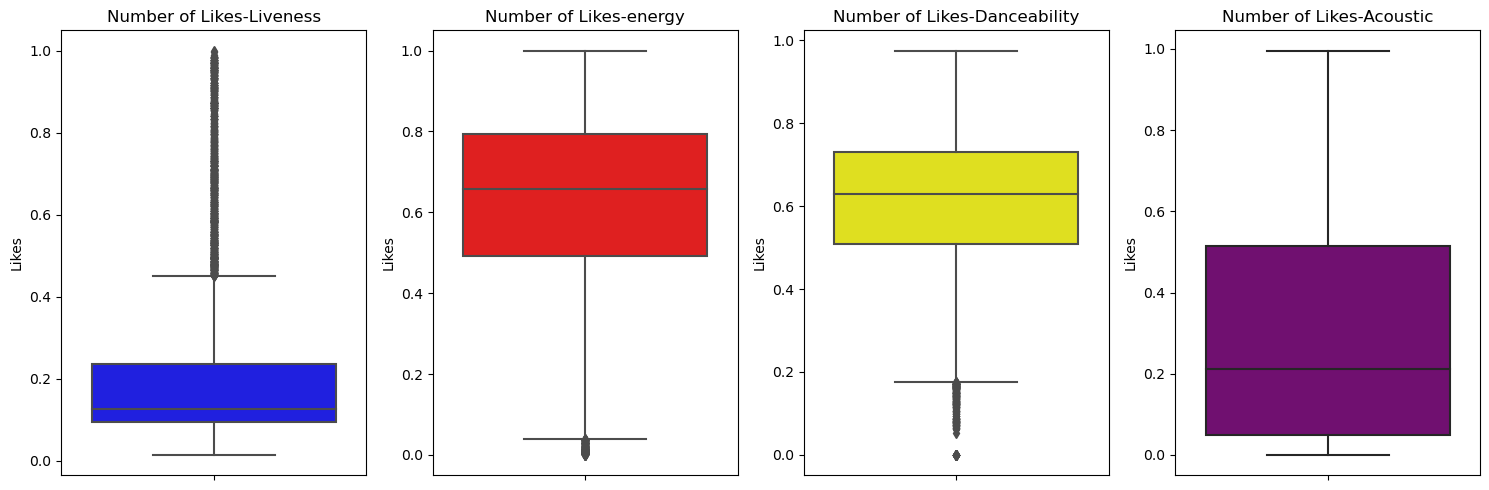

In [30]:
#COMPARING THE NUMBER OF LIKES AND GRAPHS ACCORDING TO MUSIC GENRES ON YOUTUBE AND SPOTIFY PLATFORMS

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.boxplot(y='Liveness', data=df, ax=axes[0], color="blue")
axes[0].set_title('Number of Likes-Liveness')
axes[0].set_ylabel('Likes')

sns.boxplot(y='Energy', data=df, ax=axes[1], color="red")
axes[1].set_title('Number of Likes-energy')
axes[1].set_ylabel('Likes')

sns.boxplot(y='Danceability', data=df, ax=axes[2],color="yellow")
axes[2].set_title('Number of Likes-Danceability')
axes[2].set_ylabel('Likes')

sns.boxplot(y='Acousticness', data=df, ax=axes[3],color="purple")
axes[3].set_title('Number of Likes-Acoustic')
axes[3].set_ylabel('Likes')


plt.tight_layout()
plt.show()

Comment:-Comparing Number of Likes According to Music Genre-

According to these graphs, we see that the most popular and liked music genres are ‘Energy and Danceability’.

Although there are outliers, we can say that recording videos made from live broadcasts such as concerts or music programmes have the lowest number of likes.

Looking at the acoustic music genre graph, we can see that the average number of likes is 200,000 and it has a wide spread.  shows the diversity of the number of likes.

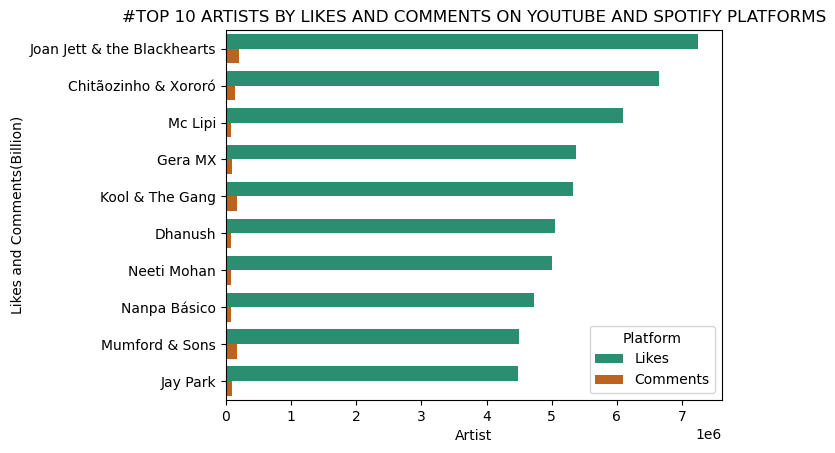

In [32]:
#TOP 10 ARTISTS BY LIKES AND COMMENTS ON YOUTUBE AND SPOTIFY PLATFORMS

df_grouped = df.groupby('Artist')[['Likes', 'Comments']].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Likes', ascending=False)[:10]

df_melted = pd.melt(df_grouped, id_vars=['Artist'], var_name='Platform', value_name='Counts')

sns.barplot(y='Artist', x='Counts', hue='Platform', data=df_melted, orient = 'h', palette='Dark2')
plt.xticks(rotation=0)
plt.xlabel('Artist')
plt.ylabel('Likes and Comments(Billion)')
plt.title('#TOP 10 ARTISTS BY LIKES AND COMMENTS ON YOUTUBE AND SPOTIFY PLATFORMS')
plt.show()

Comment:-Likes and Comments on Youtube&Spotify-

In this graph, I would like to comment on why there may be a difference between these two actions rather than the number of likes and comments received by artists.

We see that there is a serious difference between commenting on a song or a video clip and liking it.
While commenting requires time, liking is a very fast action that does not take time. This may have an effect on this.
Also, commenting may require language skills. For example, you can like a song in Italian, but in order to comment on it, you need to know  English, Spanish or Italian. This can be a barrier to commenting. In contrast, liking is a universal tool that does not require practice and the ability to express language skills. There may therefore be a clear difference.

In [28]:
#TOP 20 VIEWS ON YOUTUBE BY ARTIST; NUMBER OF LISTENS ON SPOTIFY

data = df.groupby("Artist").agg({"Stream" : "mean", 
                                 "Views" : "mean"}).sort_values(by = [
                           "Stream", "Views"], ascending = [False, False]).head(20).reset_index()
data

,Artist,Stream,Views
0,Eminem,1.548872e+09,1.931315e+06
1,Post Malone,1.433984e+09,2.050936e+06
2,XXXTENTACION,1.105977e+09,1.908086e+06
3,Justin Bieber,1.092746e+09,1.532923e+07
4,Avicii,1.083978e+09,1.677290e+07
5,Maroon 5,1.062196e+09,2.311418e+06
6,Queen,9.886080e+08,9.182470e+05
7,Bruno Mars,9.345283e+08,9.077697e+06
8,Linkin Park,7.788802e+08,4.443698e+07
9,Bad Bunny,5.934124e+08,6.085069e+07


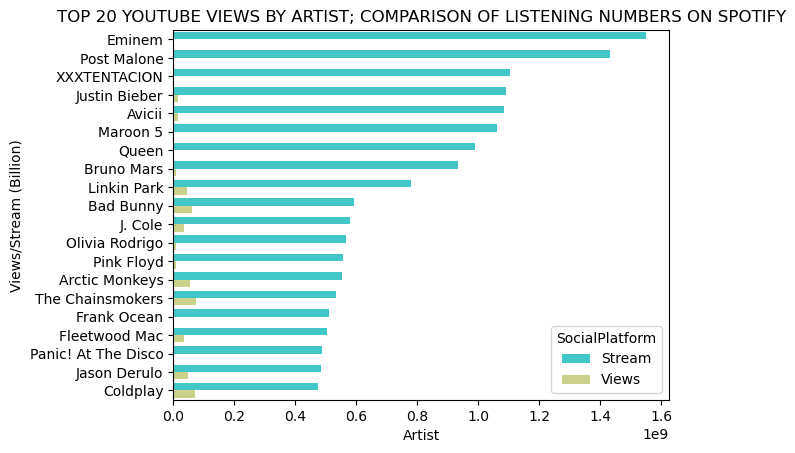

In [29]:
#TOP 20 YOUTUBE VIEWS BY ARTIST; COMPARISON OF LISTENING NUMBERS ON SPOTIFY

data_grouped = data.sort_values(by='Stream', ascending=False)[:20]
data_melted = pd.melt(data_grouped, id_vars=['Artist'], var_name='SocialPlatform', value_name='Counts')

sns.barplot(y='Artist', x='Counts', hue='SocialPlatform', data=data_melted, orient = 'h', palette='rainbow')
plt.xticks(rotation=0)
plt.xlabel('Artist')
plt.ylabel('Views/Stream (Billion)')
plt.title('TOP 20 YOUTUBE VIEWS BY ARTIST; COMPARISON OF LISTENING NUMBERS ON SPOTIFY')
plt.show()

Comment:-Top 20 Artist-

Similar to the comment I made above, I can say that the fact that platforms such as spotify provide more comfortable listening while doing a job may be a factor in the number of listens being higher than the number of views. Spotify also offers personalised playlists and recommendations. This is a strategy that can discover new music and increase the number of listens. This may have an effect.

In addition, allowing users to listen to music both over the internet and without the need for an internet connection may increase listening times. Since platforms such as Youtube are video-view-oriented, Spotify may be used more than Youtube in terms of being available at slow internet speeds, allowing offline listening and using less internet quota.

In [36]:
#10 SONGS-THE MOST LIKED, WATCHED, LISTENED AND COMMENTED

top10_views = df.nlargest(10, 'Views').sort_values(by='Views', ascending=True)
top10_comments = df.nlargest(10, 'Comments').sort_values(by='Comments', ascending=True)
top10_likes = df.nlargest(10, 'Likes').sort_values(by='Likes', ascending=True)

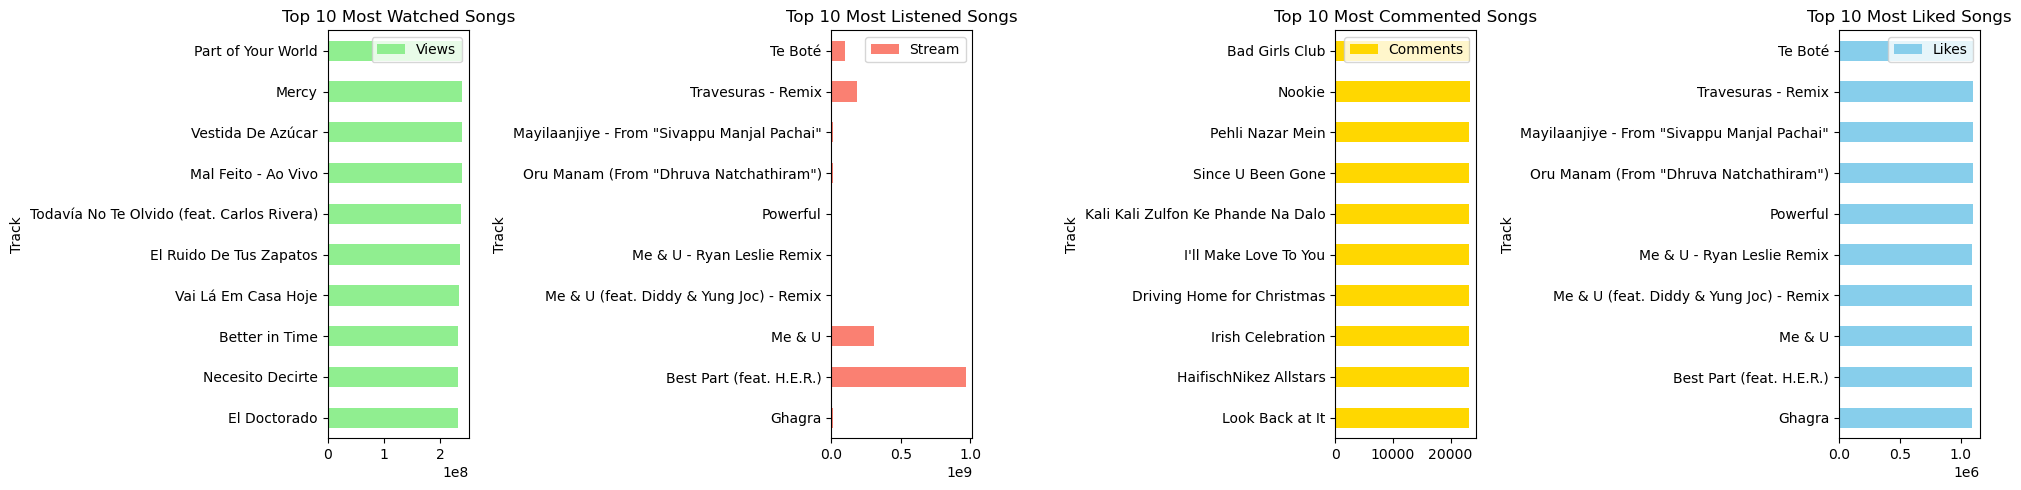

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

top10_views.plot(kind='barh', x='Track', y='Views', ax=axs[0],color='lightgreen')
axs[0].set_title('Top 10 Most Watched Songs')


top10_likes.plot(kind='barh', x='Track', y='Stream', ax=axs[1],color='salmon')
axs[1].set_title('Top 10 Most Listened Songs')

top10_comments.plot(kind='barh', x='Track', y='Comments', ax=axs[2],color='gold')
axs[2].set_title('Top 10 Most Commented Songs')


top10_likes.plot(kind='barh', x='Track', y='Likes', ax=axs[3],color='skyblue')
axs[3].set_title('Top 10 Most Liked Songs')


fig.tight_layout()
plt.show()

Comment:-10 Songs-

This graph shows the 10 most watched, most listened, most commented and most liked songs.

The number of likes in the most watched song list is very close to each other. We see that there is also a duet in this list.

In the most listened song list, we see that there are more remix and duet songs compared to the most watched list. 

In the list of songs with the most comments, the numbers are close to each other, but the songs in the other list are not included.
Since this category shows the capacity of songs to create discussion or interaction among listeners, it means that these artists have a high level of interaction with listeners/viewers.

It is observed that collaborations such as remixes and duets stand out in the list of most popular songs. Even, different remix versions of the same song are also liked. 

In general, ‘Me&U’ and its remixes are both on the most liked and most listened to list. This means that, this song has been listened to by a wide audience and is very popular. We can say that this song appeals to a wide audience.

We see that there are remixes and collaborations in the lists of watching, listening and liking. So, in the music world, this kind of 
co-productions are considered to contribute positively to the popularity of artists and songs.

There are also different artists and songs in the Top 10 lists. We can say that music listeners are interested in various music genres.

Text(0.5, 0.98, 'TOP 5-HAPPY AND SAD SONGS')

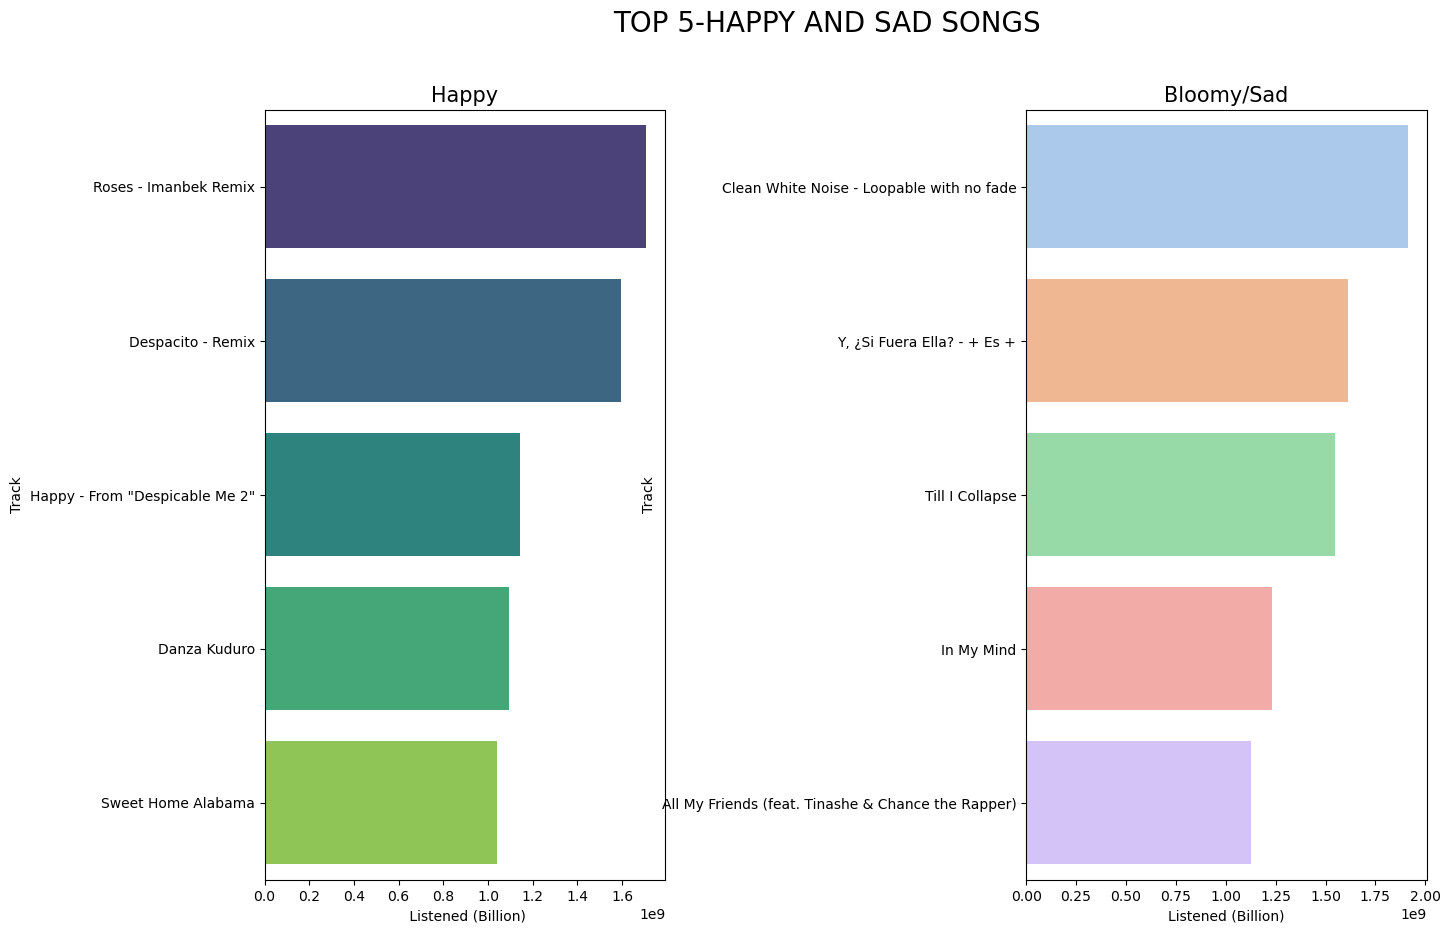

In [41]:
#VALANCE VARIABLE 

fig ,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
fig.subplots_adjust(wspace=0.9)
# Valence with score above 0.8

happy_track = df.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
happy_track = happy_track[happy_track['Valence']>0.8].head(5)

sns.barplot(happy_track,x='Stream',y='Track',ax=ax1, palette="viridis")
ax1.set_title("Happy",fontsize=15)
ax1.set_xlabel(" Listened (Billion)")


sad_track = df.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
sad_track = sad_track[sad_track['Valence']<0.2].head(5)

sns.barplot(sad_track,x='Stream',y='Track',ax=ax2, palette="pastel")
ax2.set_title("Bloomy/Sad",fontsize=15)
ax2.set_xlabel("Listened (Billion)")

fig.suptitle("TOP 5-HAPPY AND SAD SONGS",fontsize=20)

In [42]:
#Correlation between liking-commenting-watching-listening variables

korel2 = df[['Comments','Views','Likes','Stream' ]].corr()
print(korel2)

          Comments     Views     Likes    Stream
Comments  1.000000  0.709988  0.830515  0.263481
Views     0.709988  1.000000  0.827809  0.274670
Likes     0.830515  0.827809  1.000000  0.337123
Stream    0.263481  0.274670  0.337123  1.000000


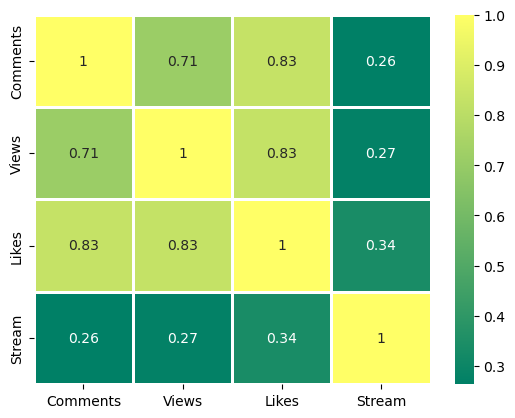

In [43]:
sns.heatmap(korel2, annot=True, cmap="summer", linewidths=1.0)
plt.show()

Comment:-Correlation-

I'd like to see if there is a relationship between this heat map and the variables.
Youtube:
We can say that there is a strong positive relationship between ‘getting views and likes’.(0.84)
‘The more a video or content is watched, the more likely it is to get likes.’

We see that there is a positive relationship between ‘getting likes and commenting’, although it is not as strong as between getting views and getting likes. ‘We can say that liked songs/posts also receive more comments.’

When we look at whether the likelihood of commenting on highly watched content/publications also increases, we see that the relationship is moderate. ‘We can say that content that is watched more “usually” receives more comments.’

Spotify:
There is a positive relationship in general, but there are weaker relationships compared to other variables.
                    
The correlation between comments and listening is 0.24; 
The correlation between likes and rest is 0.37.
The correlation between views and listens is 0.32. We can't say that every song that is watched is also listened to or vice versa.

In general, when artists produce content, receiving comments or likes can also increase the number of views/listens. For this reason, I can say that it is important for artists to be in interaction with their audience and to communicate with them by actively using their social media accounts in order for their content to become more widespread.

Text(0.5, 1.0, 'THE RELATIONSHIP BETWEEN THE NUMBER OF VIEWS AND THE DURATION OF THE SONG/BROADCAST')

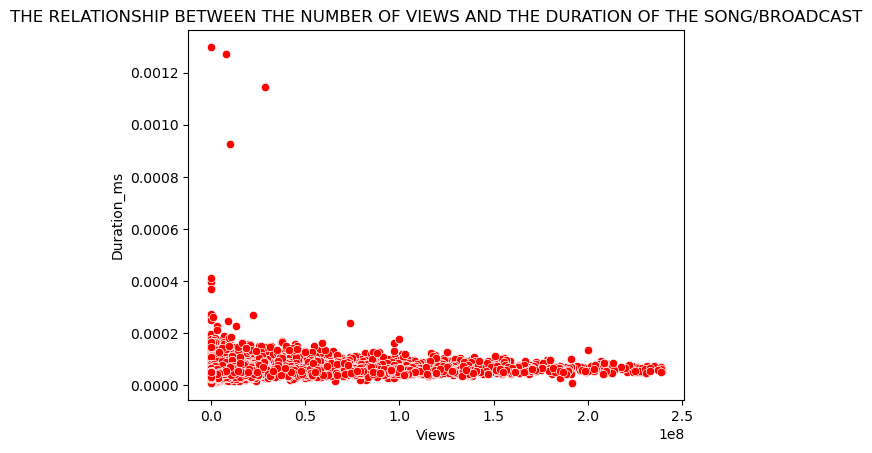

In [45]:
#THE RELATIONSHIP BETWEEN THE NUMBER OF VIEWS AND THE DURATION OF THE SONG/BROADCAST

df_duration = df 
df_duration['Duration_ms'] = (df_duration['Duration_ms']/1000)/60
fig = sns.scatterplot(df_duration,y='Duration_ms',x='Views',color="red")
fig.set_title("THE RELATIONSHIP BETWEEN THE NUMBER OF VIEWS AND THE DURATION OF THE SONG/BROADCAST",fontsize=12)

Comment:-The Relationship Between th Number of views and The Duration of The Song/Broadcast-

Generally, there is a concentration of songs with a short duration (usually less than 5 min.). We can say that popular songs consist of songs of short duration and the audience tends to gravitate towards them.

There are a few songs longer than 10 minutes. These songs are likely to be unpopular genres that appeal to a specific audience. These can be speeches, in which an expert presents his/her ideas in his/her field of expertise or in connection with topics of interest to a person (Economy, Psychology, Game promotion, Product description, etc.)

Among the songs with around 1 billion views, there is diversity in song durations. We can interpret this situation as follows: listeners/viewers show moderate interest in some songs/broadcasts regardless of the song duration.

Text(0.5, 1.0, 'THE RELATIONSHIP BETWEEN THE NUMBER OF LISTENING AND THE DURATION OF THE SONG/BROADCAST')

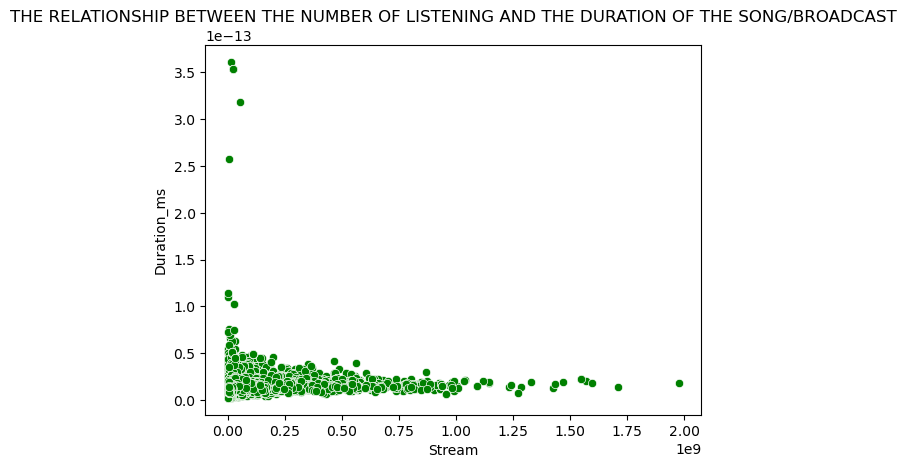

In [47]:
#THE RELATIONSHIP BETWEEN THE NUMBER OF LISTENING AND THE DURATION OF THE SONG/BROADCAST

df_duration = df 
df_duration['Duration_ms'] = (df_duration['Duration_ms']/1000)/60
fig = sns.scatterplot(df_duration,y='Duration_ms',x='Stream',color="green")
fig.set_title("THE RELATIONSHIP BETWEEN THE NUMBER OF LISTENING AND THE DURATION OF THE SONG/BROADCAST",fontsize=12)

Comment:-The Relationship Between th Number of Listening and The Duration of The Song/Broadcast-

When we look at the general distribution in the graph, we see that most of the data points are concentrated between low number of listens and short durations.

According to the graph, there is no significant relationship between the duration of the song/broadcast and the number of listens. In other words, it does not affect the popularity of the song/broadcast. 

Songs with shorter durations were listened to more than songs with longer durations.
This may be due to the fact that shorter songs are consumed faster and therefore repeated more often.

The data points are scattered over a large area with no obvious relationship.
Data density is high in the lower left of the graph. 
This means that most songs have a short duration. Some songs are also significantly longer than others.  seem to have received flows, but their duration also seems to be generally short.

We also see outliers. These may be popular songs with a large audience size. 

Text(0.5, 1.0, 'THE RELATIONSHIP BETWEEN LISTENING/VIEWING BY ALBUM TYPE ON YOUTUBE AND SPOTIFY')

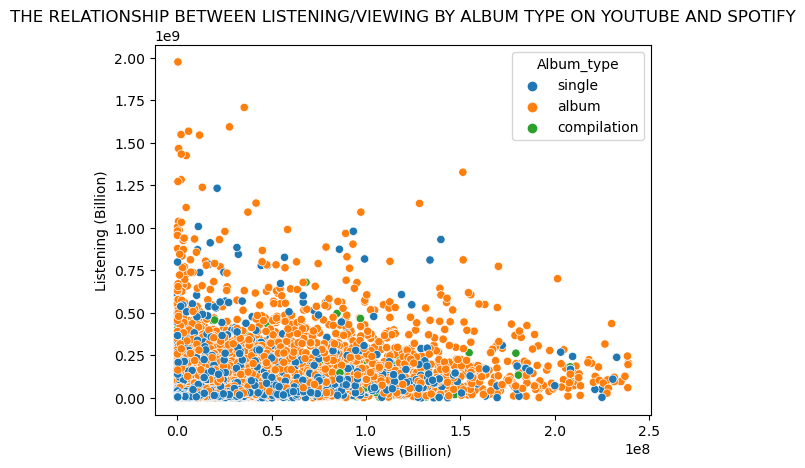

In [48]:
#THE RELATIONSHIP BETWEEN LISTENING/VIEWING BY ALBUM TYPE ON YOUTUBE AND SPOTIFY

fig = sns.scatterplot(df,x='Views',y='Stream',hue='Album_type')
fig.set_ylabel("Listening (Billion)")

fig.set_xlabel("Views (Billion)")
fig.set_title("THE RELATIONSHIP BETWEEN LISTENING/VIEWING BY ALBUM TYPE ON YOUTUBE AND SPOTIFY",fontsize=12)

Comment:-Album Type-

The majority of album types seem to be concentrated around 0.5 billion views and 1 billion listens/views. Each album type has a low number of both views and listens.

The orange coloured dots represent ‘Albums’ as an album type. It has higher values in the number of listens/views compared to other album types. There must be at least 7 songs to be an album. Therefore, listening/viewing may be high.

Blue dots represent ‘singles’, which have lower number of listens and views than ‘albums’. However, some singles have very high number of listens and views. These singles may be successful debut singles. They seem to have become popular and reached a wide audience. Therefore, releasing singles can be a good option for the artist if it is to release songs that can be called hits.

Compilation albums are represented in smaller numbers and generally have moderate numbers of listens and views. It seems to be quite low compared to the others. There are a few green dots in the graph.


There are a few outliers in the chart. For example, there are some songs with around 1.5 billion views and 2 billion streams. These songs may have been big hits and listened to by large masses.
Songs with high numbers of views and streams are usually albums.

In general, we can't say that there is a clear relationship between the number of views and listens.
This is because the behaviour of listeners on different platforms may be different and some songs may be more popular on one platform but not on other. After all, platforms also present content differently.

# _Exploratory Data Analysis-3-Artists-Music Genres_

In [50]:
#RATES OF THE TOP 5 MOST LISTENED SONGS ON #SPOTIFY ACCORDING TO 4 MUSIC VARIABLES

top_songs= df.sort_values('Stream', ascending=False).head(5)
songs_metrics = top_songs[['Title', 'Energy', 'Danceability', 'Acousticness','Liveness']]
songs_metrics.loc[:, ['Energy', 'Danceability', 'Acousticness','Liveness']] *= 100


songs_metrics['Energy'] = songs_metrics['Energy'].apply(lambda x: round(x, 0))
songs_metrics['Danceability'] = songs_metrics['Danceability'].apply(lambda x: round(x, 0))
songs_metrics['Acousticness'] = songs_metrics['Acousticness'].apply(lambda x: round(x, 0))
songs_metrics['Liveness'] = songs_metrics['Liveness'].apply(lambda x: round(x, 0))
songs_metrics

,Title,Energy,Danceability,Acousticness,Liveness
14072,Justin Bieber - Love Yourself (Official Video),38.0,61.0,84.0,28.0
18528,SAINt JHN - ROSES (Official Music Video) Imanb...,72.0,77.0,1.0,36.0
1151,"Luis Fonsi, Daddy Yankee - Despacito ft. Justi...",80.0,65.0,23.0,7.0
569,Oasis - Wonderwall (Official HD Remastered Video),89.0,38.0,0.0,19.0
124,Eminem - Till I Collapse Feat. Nate Dogg [OFFI...,85.0,55.0,6.0,8.0


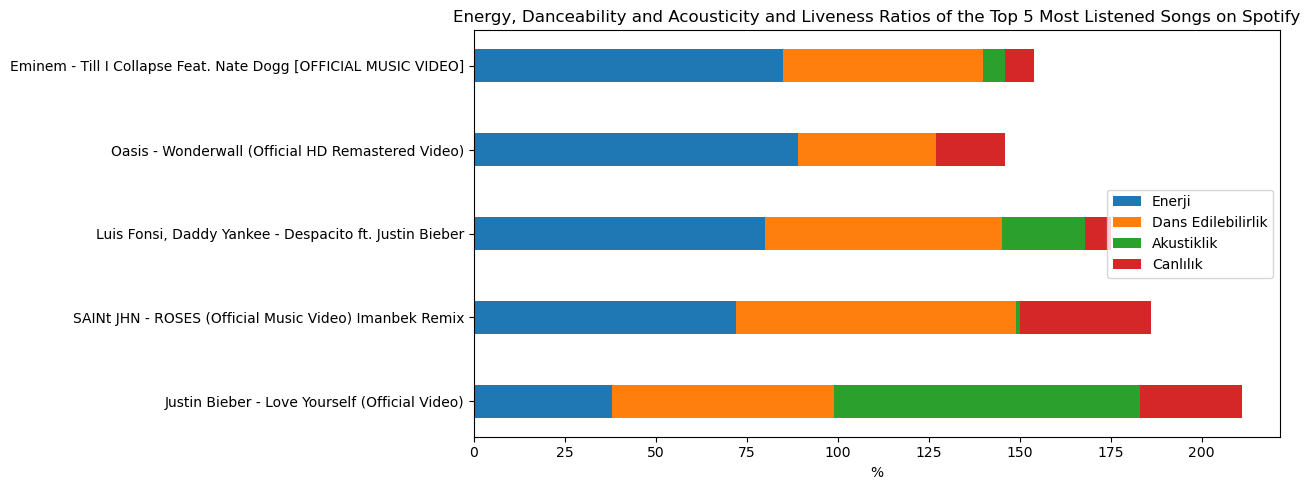

In [51]:
#RATES OF THE TOP 5 MOST LISTENED SONGS ON #SPOTIFY ACCORDING TO 4 MUSIC VARIABLES

songs = songs_metrics['Title']
energy = songs_metrics['Energy']
danceability = songs_metrics['Danceability']
acousticness = songs_metrics['Acousticness']
liveness=songs_metrics['Liveness']

plt.figure(figsize=(13, 5))

bar_width = 0.4

plt.barh(songs, energy, height=bar_width, label='Enerji')
plt.barh(songs, danceability, height=bar_width, label='Dans Edilebilirlik', left=energy)
plt.barh(songs, acousticness, height=bar_width, label='Akustiklik', left=energy + danceability)
plt.barh(songs, liveness, height=bar_width, label='Canlılık', left=energy + danceability+ acousticness)

plt.xlabel('%')
plt.title('Energy, Danceability and Acousticity and Liveness Ratios of the Top 5 Most Listened Songs on Spotify')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

Comment:-Top 5-

When we look at the characteristics of the 5 most listened songs on Spotify in terms of energy, danceability, acousticity and live recording types, it is noteworthy that the most listened songs have a high "energy" variable rate. Following this, the highest rate is observed in "danceability". We can say that if artists prioritise these two features in their songs, they are more likely to be listened to more. The only song that has more acoustic features in the top 5 and has a chance to enter the top 5 belongs to Justin Bieber. At this point, the fact that Justin Bieber is generally recognised may have enabled this song to be in the top 5.

In [52]:
#TOP 3 ARTISTS WITH HIGH ENERGY AND DANCEABILITY

artist_en = df.groupby('Artist')['Energy'].mean()*100
artist_dnc = df.groupby('Artist')['Danceability'].mean()*100

artist_scores = pd.concat([artist_en, artist_dnc], axis=1)

most_en_art = artist_scores.sort_values(by='Energy', ascending=False).head(3)
most_dnc_art = artist_scores.sort_values(by='Danceability', ascending=False).head(3)


print("The Most Energetic Artist:")
print(most_en_art)

print("\nThe Most Danceable Artist:")
print(most_dnc_art)


The Most Energetic Artist:
                    Energy  Danceability
Artist                                  
Rain Fruits Sounds   97.81        19.432
Lamb of God          97.50        38.130
Killswitch Engage    97.05        41.850

The Most Danceable Artist:
                 Energy  Danceability
Artist                               
Cardi B            58.2          95.4
Madonna            68.6          92.9
Imagine Dragons    64.2          92.7


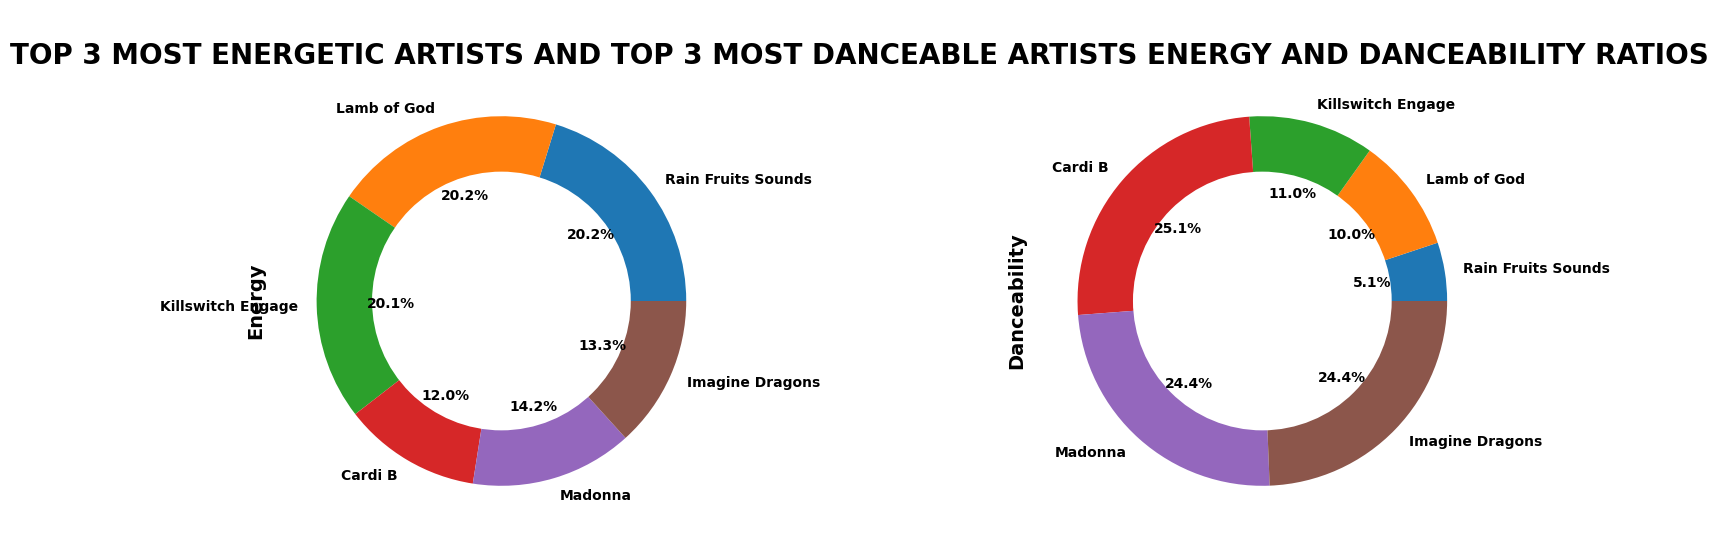

In [54]:
#TOP 3 MOST ENERGETIC ARTISTS AND TOP 3 MOST DANCEABLE ARTISTS ENERGY AND DANCEABILITY RATIOS

data = pd.concat([most_en_art, most_dnc_art], axis=0)

fig, axes = plt.subplots(1,2, figsize=(18, 6))

data['Energy'].plot.pie(ax=axes[0], legend=False, autopct='%1.1f%%', textprops={'fontweight': 'bold'})
data['Danceability'].plot.pie(ax=axes[1], legend=False, autopct='%1.1f%%', textprops={'fontweight': 'bold'})

centre_circle_0 = plt.Circle((0, 0), 0.70, fc='white')
centre_circle_1 = plt.Circle((0, 0), 0.70, fc='white')

axes[0].add_artist(centre_circle_0)
axes[1].add_artist(centre_circle_1)

axes[0].set_ylabel('Energy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Danceability', fontsize=14, fontweight='bold')

fig.suptitle('\nTOP 3 MOST ENERGETIC ARTISTS AND TOP 3 MOST DANCEABLE ARTISTS ENERGY AND DANCEABILITY RATIOS', fontsize=20, fontweight='bold')
plt.show()

Comment:-Top 3-Dancebality,Energy

Lamb of God and Killswitch Engage: Although they have higher values in energy ratings, they have lower danceability ratings. This shows that the music of these artists has higher energy but lower danceability.

Cardi B, Madonna and Imagine Dragons: Both their energy and danceability are high, indicating that the music of these artists is both energetic and danceable.

Rain Fruits Sounds: High in energy but low in danceability. This shows that although the music is energetic, it is weak in terms of danceability.

In general, we can say that artists who transfer the energy variable to their songs usually have low values in terms of danceability. Any music with high energy may be dynamic and upbeat, but it may not be suitable for dancing. If these artists reflect rhythmic elements to their songs, they can increase the number of listeners even more.
When we look at the artists with high danceability, we see that they reflect the energy in their music in a good way. Both up-tempo and rhythmic, danceable and energetic. They are all together. Artists who make these songs are more likely to be listened to more.

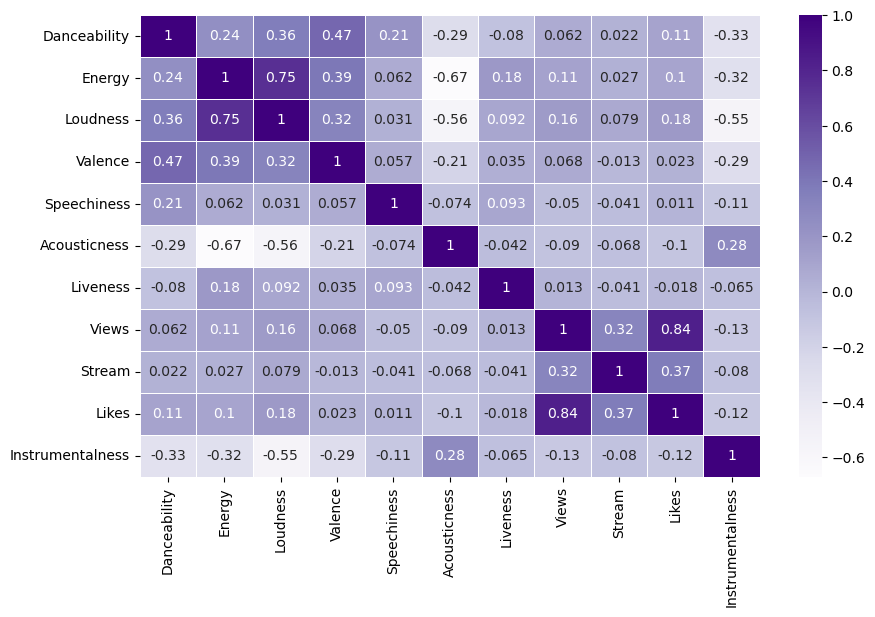

In [73]:
#THE RELATIONSHIP BETWEEN MUSIC CHARACTERISTICS AND POPULARITY MEASURES(Likes,Views,Comment...)

corr2 = df[["Danceability", "Energy", "Loudness","Valence",
                  "Speechiness", "Acousticness", "Liveness", 
                  'Views',"Stream",'Likes',"Instrumentalness"]].corr()
plt.figure(figsize=(10, 6))

sns.heatmap(corr2, annot=True, cmap="Purples", linewidths = 0.5 )
plt.show()

Comment:-Popularity Measures-

According to this graph, there is a strong positive relationship between ‘Danceability’ and ‘Valence’. It shows that songs with high danceability generally express more positive emotions. 

There is also a strong positive relationship between ‘Energy’ and ‘Loudness’. As a comment to this, we can say that songs with high energy generally have a higher volume, or songs that are related to high volume generally have higher energy. 

Another strong relationship, but with a negative direction, is ‘Acousticness’ and ‘Energy’. In other words, we can say that when the acoustic ratio increases, the energy characteristic of the music decreases. At this point, energetic music has high favourability in the data set. In this case, the acousticity of the music may also decrease the number of likes. Although not always, it can be said to be a possible situation.

We can say that the strongest positive relationship is between ‘Likes’ and ‘Views’. As long as a video is watched, the possibility of getting likes is high.

We can say that there is a moderate positive relationship between ‘Views’, ‘Stream’ and ‘Likes’. This indicates that the popularity measures of a song are related to each other. For example, songs with more views usually get more likes and are listened to more. of a song are related to each other. For example, songs with more views usually get more likes and are listened to more.

The two variables with a strong negative relationship are ‘Loudness’ and ‘Instrumentals’. As one increases, the effect of the other decreases. The loudness of instrumental music is low. We can infer that instrumental music can be calmer.

In addition, a strong negative correlation appears between ‘Energy’ and ‘Acousticity’. Songs with high energy usually have less acoustic characteristics. This may mean that energetic songs may contain more electronic elements.

Some of the variables that we can say that there may be a relationship between them, albeit very weak, are ‘Loudness’ and ‘Views’; 
‘Danceability’ and ‘Energy’; ‘Speechiness’ and ‘Danceability’, ‘Likes’ and ‘Danceability’; ‘Likes’ and ‘Danceability; “Likes” and “Energy”
‘Valance’ and ‘Loudness’; ‘Valance’ and ‘Instrumentalness’; ‘Acousticness’ and ‘Instrumentalness’; ‘Stream’ and ‘Likes’.

If we interpret these cases, we can see that there is a weak relationship between the volume and the emotions expressed by the song;i.e. the loudness may occasionally reveal emotions (unlikely). 

If we look at another weak relationship, sometimes songs without lyrics can be danceable. But not every wordless song is danceable. Or it is also possible to say the opposite, we cannot say that every danceable song is wordless, but sometimes it can be like that.

Not every instrumental song can be acoustic or vice versa.

Some of the variables that we can say that there is no relationship between them are ‘Speechiness’ and ‘Liveness’; ‘Liveness’ and ‘Loudness’ etc. We cannot say that live recordings are wordless and soundless. These variables do not affect each other at all, we can say that they have no dependence.

# _Exploratory Data Analysis-4-Youtube Channels_

In [56]:
#Views, Likes and Comments according to channels on Youtube Platform

channel_data = df[['Channel', 'Views', 'Likes', 'Comments']]

In [57]:
channel_st = channel_data.groupby('Channel').agg({'Views': 'mean', 
                                                          'Likes': 'mean', 
                                                          'Comments': 'mean'}).sort_values(by = [
"Views", "Likes", "Comments"], ascending = [False, False, False]).head(5).reset_index()

In [58]:
channel_st

,Channel,Views,Likes,Comments
0,George Henrique e Rodrigo,232968646.0,997247.0,11005.0
1,CautyTV,208414401.5,956358.5,11444.0
2,Future Classic,203265315.0,1069158.0,10747.0
3,Dj Vj Eduardo,191290992.0,807693.0,16335.0
4,Heroes Del Silencio Catálogo,190805443.0,791783.0,21894.0


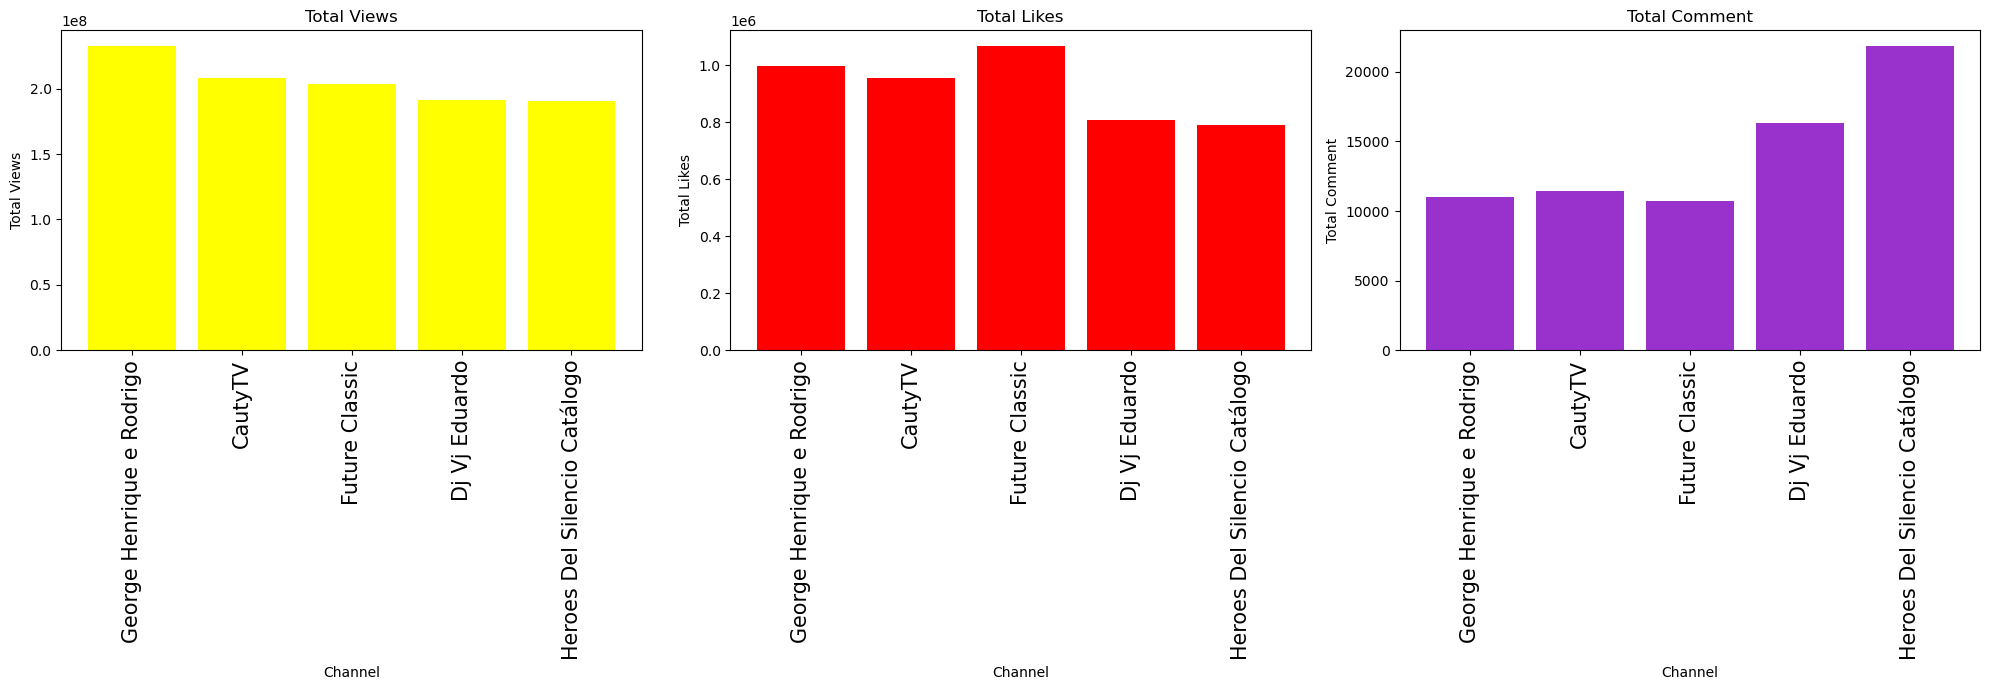

In [60]:
#NUMBER OF VIEWS, LIKES AND COMMENTS BY CHANNEL AND COMPARISON OF TOP 5 CHANNELS

plt.figure(figsize=(20,7))
bar_colors = ['#FFFF00', '#FF0000', '#9932CC']

plt.subplot(1, 3, 1)
plt.bar(channel_st['Channel'], 
       channel_st['Views'], 
        color=bar_colors[0])
plt.xlabel('Channel')
plt.ylabel('Total Views')
plt.title('Total Views')
plt.xticks(rotation=90, fontsize=15)

plt.subplot(1, 3, 2)
plt.bar(channel_st['Channel'], 
        channel_st['Likes'],
        color=bar_colors[1])
plt.xlabel('Channel')
plt.ylabel('Total Likes')
plt.title('Total Likes')
plt.xticks(rotation=90, fontsize=15)

plt.subplot(1, 3, 3)
plt.bar(channel_st['Channel'], 
        channel_st['Comments'], 
        color=bar_colors[2])
plt.xlabel('Channel')
plt.ylabel('Total Comment')
plt.title('Total Comment')
plt.xticks(rotation=90, fontsize=15)

plt.tight_layout()
plt.show()

Comment:-Channels-

The channel ‘George Henrique e Rodrigo’ leads in the number of views, followed by ‘Future Classic’ in the number of likes and ‘Heroes Del Silencio Catálogo’ in the number of comments.

The followers of this channel, which has more viewers, seem less willing to like or leave comments, while the followers of the channel ‘Future Classic’, which has more likes, are more active.

On the George Henrique e Rodrigo and Future Classic channels, there is an imbalance between the number of views and the number of likes/comments. In order to get viewers to interact more on these channels, there could be some messages in the videos or at the end of the videos to encourage viewers to like the video and leave comments.

The high number of comments on the Heroes Del Silencio Catálogo suggests that the channel content may have a lot of talking points.
The topics discussed are of interest to viewers and viewers tend to comment. 
However, this channel lags behind other channels in both views and likes.
To increase this engagement, the channel could use strategies such as responding to comments or creating content based on viewer feedback, so that viewers who come to the channel can watch other content and increase viewership.

CautyTV and DJ Vj Eduardo are in the same position in all 3 categories in the ranking. These channels may include interactive elements in their content to encourage their viewers to leave more likes and comments.

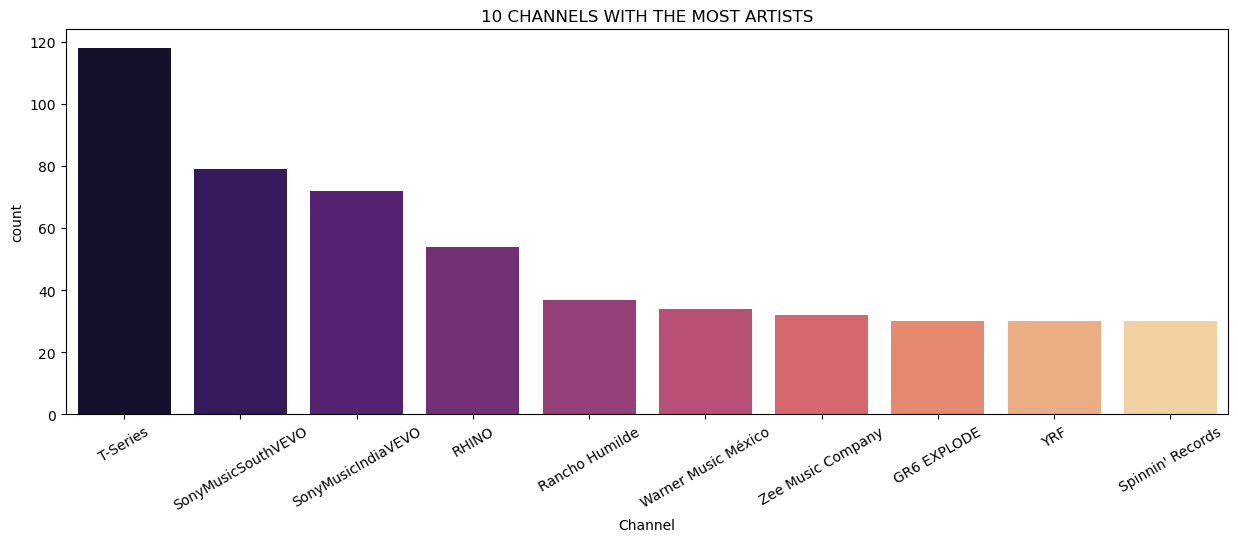

In [61]:
#10 CHANNELS WITH THE MOST ARTISTS

plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x='Channel', order=df['Channel'].value_counts().index[:10], palette="magma")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("10 CHANNELS WITH THE MOST ARTISTS")
plt.show()

In [63]:
#Channels' Number of Artists, Likes, Views, Listening

channel_datas = df[['Channel', 'Artist','Likes','Views','Stream']]

In [64]:
channel_datas2 = channel_datas.groupby('Channel').agg({'Artist': 'count', 
                                                          'Likes': 'mean', 
                                                          'Views': 'mean',
                                                      'Stream': 'mean'}).sort_values(by = [
"Artist", "Likes", "Views","Stream"], ascending = [False, False, False,False]).head(10).reset_index()

In [65]:
channel_datas2

,Channel,Artist,Likes,Views,Stream
0,T-Series,118,406210.822034,4.970866e+07,2.764972e+07
1,SonyMusicSouthVEVO,79,248668.050633,3.717665e+07,1.990588e+07
2,SonyMusicIndiaVEVO,72,425213.347222,5.417110e+07,3.228065e+07
3,RHINO,54,141754.333333,2.148792e+07,1.033924e+08
4,Rancho Humilde,37,271886.729730,3.265977e+07,4.917563e+07
5,Warner Music México,34,197679.205882,4.648519e+07,8.601209e+07
6,Zee Music Company,32,372278.656250,4.721527e+07,3.769207e+07
7,YRF,30,601902.800000,9.373455e+07,2.780507e+07
8,GR6 EXPLODE,30,384090.066667,4.054481e+07,4.396790e+07
9,Spinnin' Records,30,196019.400000,2.616368e+07,1.096053e+08


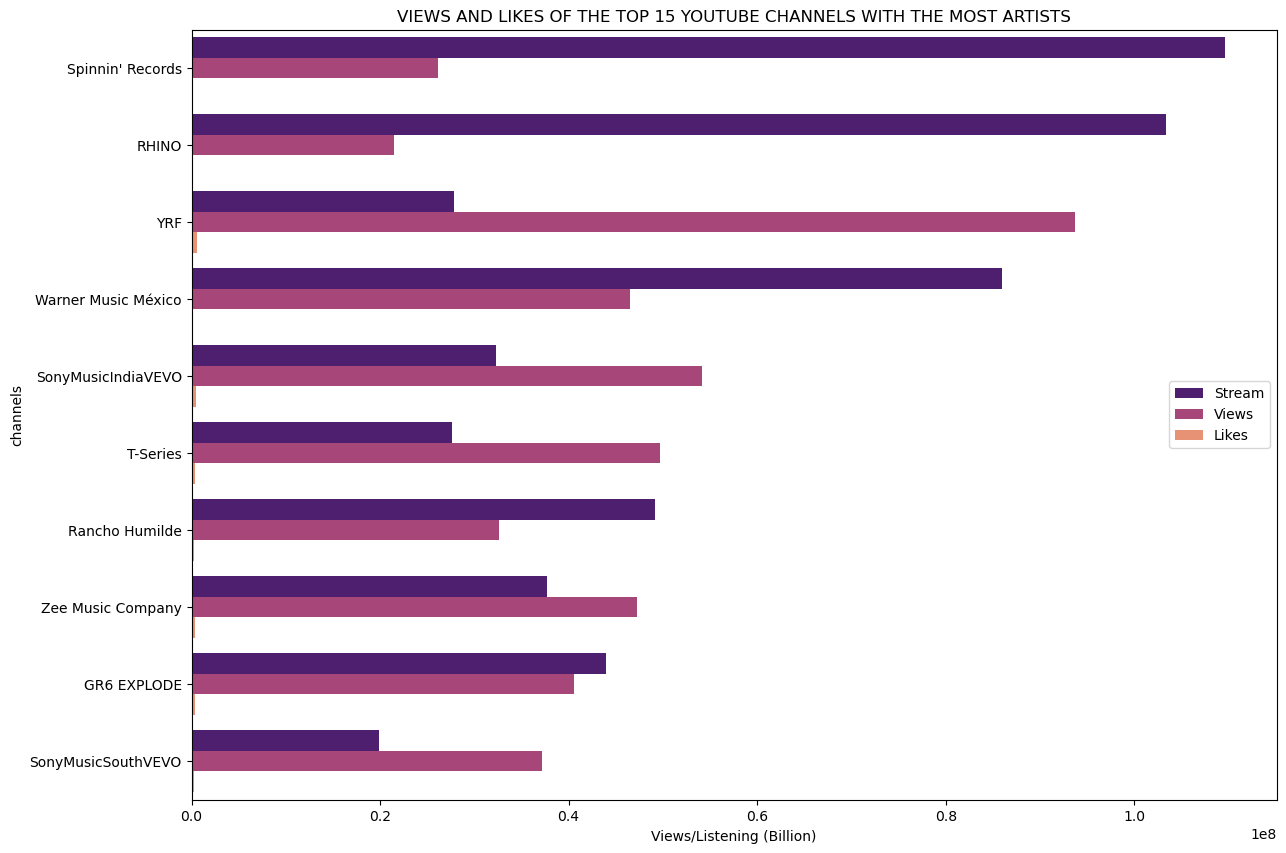

In [66]:
# VIEWS AND LIKES OF THE TOP 15 YOUTUBE CHANNELS WITH THE MOST ARTISTS

channel_melted = pd.melt(channel_datas2, id_vars=['Channel','Artist'], var_name='Views&Likes&Stream', value_name='Counts').sort_values(by='Counts',ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(y='Channel', x='Counts', hue='Views&Likes&Stream', data=channel_melted, orient='h', palette='magma')
plt.xticks(rotation=0)
plt.xlabel('Views/Listening (Billion)')
plt.ylabel('channels')
plt.legend(loc='center right')
plt.title('VIEWS AND LIKES OF THE TOP 15 YOUTUBE CHANNELS WITH THE MOST ARTISTS')
plt.show()